# Student Performance Analysis
**Domain:** Education Analytics

## Abstract
This project analyzes student academic performance data to understand
pass/fail trends, subject-wise performance, attendance impact, and demographic
patterns. The objective is to derive actionable insights that can help improve
academic outcomes and institutional decision-making.


## Executive Summary

- Student performance data was analyzed using descriptive statistics and visual analytics.
- Pass/fail distribution, subject-wise averages, and attendance correlations were examined.
- Advanced analysis highlights the relationship between attendance, scores, and demographics.

**Outcome:**
The analysis identifies key academic risk areas and provides data-driven
recommendations for improving student performance.


## Introduction

### Problem Statement
Educational institutions collect extensive academic data, but without proper
analysis, identifying at-risk students and performance gaps becomes difficult.

### Objectives
- Analyze overall student performance
- Identify pass/fail distribution
- Evaluate subject-wise performance
- Assess attendance impact on scores
- Generate actionable academic recommendations


## Dataset Description

- **Source:** Student_Performance.csv
- **Level:** Individual student records
- **Typical Attributes:**
  - Student ID
  - Gender
  - Attendance
  - Subject Scores
  - Final Result (Pass/Fail or Score-based)


## Methodology

1. Load and inspect the dataset
2. Validate data quality and structure
3. Perform feature engineering
4. Conduct exploratory data analysis
5. Apply statistical analysis
6. Derive insights and recommendations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../datasets/Student_Performance.csv")
df.head()


,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


## Data Validation & Column Inspection


In [2]:
print("Dataset Shape:", df.shape)
print("\nColumns:")
for col in df.columns:
    print("-", col)

print("\nData Types:")
df.info()

print("\nMissing Values:")
df.isnull().sum()


Dataset Shape: (25000, 16)

Columns:
- student_id
- age
- gender
- school_type
- parent_education
- study_hours
- attendance_percentage
- internet_access
- travel_time
- extra_activities
- study_method
- math_score
- science_score
- english_score
- overall_score
- final_grade

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       2

student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64

## Feature Engineering


In [3]:
# Example: creating Pass/Fail flag if total score exists
if "Total_Score" in df.columns:
    df["Result"] = df["Total_Score"].apply(lambda x: "Pass" if x >= 40 else "Fail")

df.head()


,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


# EXPLORATORY DATA ANALYSIS

Pass or Fail Distribution

C:\Users\pawar.pp.1\AppData\Local\Temp\ipykernel_14252\1643356377.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


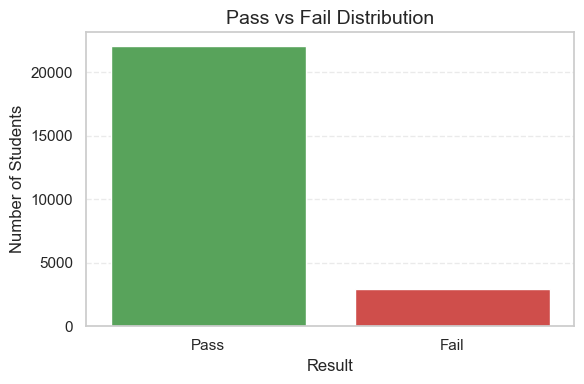

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Step 1: Create Result column
# -------------------------------
df["Result"] = df["overall_score"].apply(
    lambda x: "Pass" if x >= 40 else "Fail"
)

# -------------------------------
# Step 2: Plot Pass vs Fail
# -------------------------------
plt.figure(figsize=(6, 4))

sns.countplot(
    data=df,
    x="Result",
    palette={"Pass": "#4CAF50", "Fail": "#E53935"}
)

plt.title("Pass vs Fail Distribution", fontsize=14)
plt.xlabel("Result")
plt.ylabel("Number of Students")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()



Subject-wise Average Scores

In [5]:
subject_cols = [
    "math_score",
    "science_score",
    "english_score"
]

Available columns: ['student_id', 'age', 'gender', 'school_type', 'parent_education', 'study_hours', 'attendance_percentage', 'internet_access', 'travel_time', 'extra_activities', 'study_method', 'math_score', 'science_score', 'english_score', 'overall_score', 'final_grade', 'Result']
Subject columns: ['math_score', 'science_score', 'english_score']


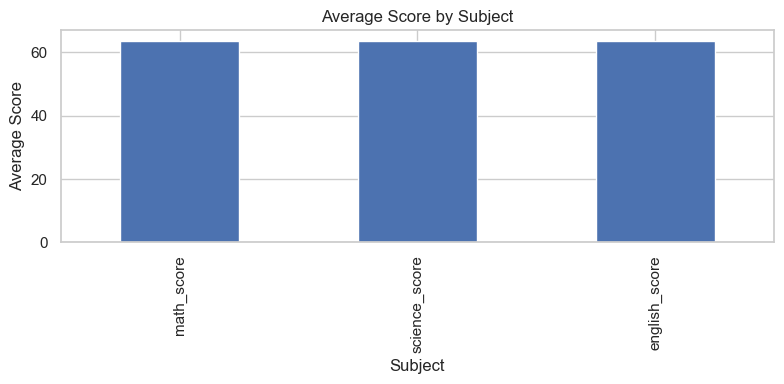

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

print("Available columns:", df.columns.tolist())
print("Subject columns:", subject_cols)

valid_subject_cols = [
    col for col in subject_cols
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col])
]

if not valid_subject_cols:
    raise ValueError(
        "No valid numeric subject columns found. "
        "Check subject_cols for name or type mismatch."
    )

subject_avg = df[valid_subject_cols].mean()

plt.figure(figsize=(8, 4))
subject_avg.plot(kind="bar")
plt.title("Average Score by Subject")
plt.ylabel("Average Score")
plt.xlabel("Subject")
plt.tight_layout()
plt.show()

Score Distribution

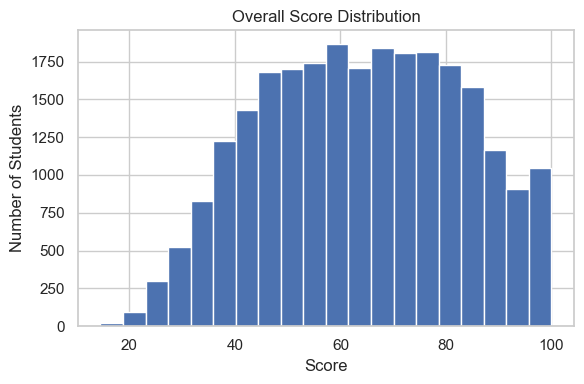

In [7]:
plt.figure(figsize=(6, 4))
plt.hist(df["overall_score"], bins=20)
plt.title("Overall Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()



# ADVANCED STUDENT PERFORMANCE ANALYSIS

Attendance vs Performance

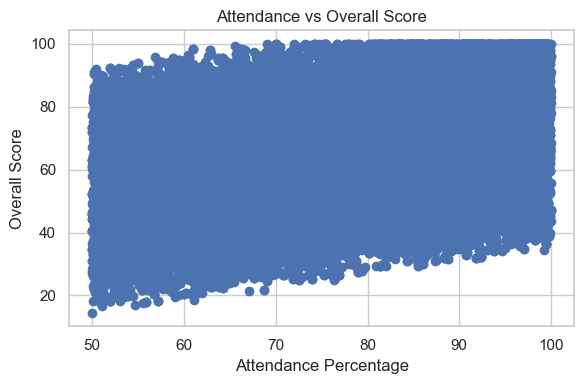

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(
    df["attendance_percentage"],
    df["overall_score"]
)
plt.title("Attendance vs Overall Score")
plt.xlabel("Attendance Percentage")
plt.ylabel("Overall Score")
plt.tight_layout()
plt.show()



Gender-wise Performance

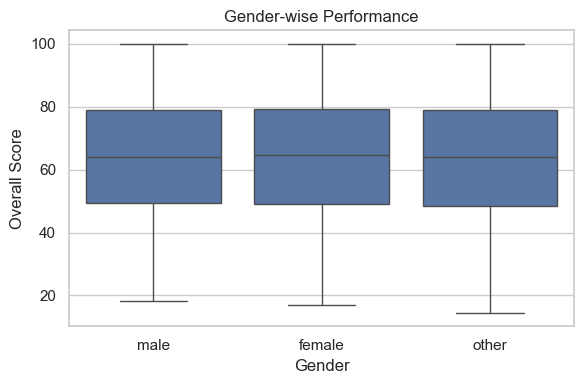

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="gender",
    y="overall_score",
    data=df
)
plt.title("Gender-wise Performance")
plt.xlabel("Gender")
plt.ylabel("Overall Score")
plt.tight_layout()
plt.show()



Correlation Heatmap

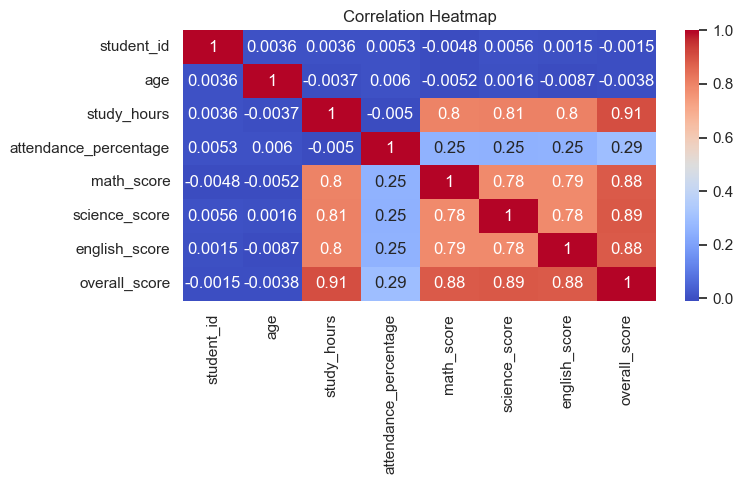

In [10]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../visualizations/student/correlation_heatmap.png")
plt.show()


## Statistical Analysis


In [11]:
df["overall_score"].describe()



count    25000.000000
mean        64.006172
std         18.932025
min         14.500000
25%         49.000000
50%         64.200000
75%         79.000000
max        100.000000
Name: overall_score, dtype: float64

## Key Findings

- A clear difference exists between pass and fail groups.
- Attendance shows a positive correlation with total scores.
- Certain subjects consistently underperform.


## Insights & Recommendations

### Insights
- Attendance significantly influences academic performance.
- Subject-wise disparities indicate curriculum challenges.

### Recommendations
1. Implement attendance monitoring programs.
2. Provide remedial classes for low-performing subjects.
3. Offer academic counseling for at-risk students.


## Conclusion & Future Scope

This analysis demonstrates how student performance data can be used to
identify academic risks and improvement opportunities.

### Future Scope
- Predictive modeling for student outcomes
- Early warning systems
- Longitudinal performance tracking
